**Tahapan Preprocessing**:



1. Import library
2. Baca dataset
3. Pembersihan Data
4. Transformasi Data
5. Reduksi Data


#1. Import Library

In [ ]:
import pandas as pd

#2. Baca dataset


1.   PassengerId - Id unik untuk setiap penumpang. Setiap Id berbentuk gggg_pp di mana gggg menunjukkan grup yang ditumpangi penumpang dan pp adalah nomor penumpang dalam grup tersebut. Orang-orang dalam satu grup sering kali merupakan anggota keluarga, tetapi tidak selalu.
2. HomePlanet - Planet tempat penumpang berangkat, biasanya planet tempat tinggal permanen mereka.
3. CryoSleep - Menunjukkan apakah penumpang memilih untuk mati suri selama perjalanan. Penumpang yang berada dalam kondisi tidur mati akan dikurung di dalam cabin.
4. Cabin - Nomor kabin tempat penumpang menginap. Berupa deck/num/side, di mana sisi dapat berupa P untuk Port atau S untuk Starboard.
5. Destination - Planet tempat penumpang akan turun.
6. Usia - Usia penumpang.
7. VIP - Apakah penumpang telah membayar layanan VIP khusus selama pelayaran.
8. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Jumlah yang telah ditagihkan oleh penumpang di setiap fasilitas mewah Kapal Ruang Angkasa Titanic.
9. Nama - Nama depan dan belakang penumpang.
10. Transported - Apakah penumpang diangkut ke dimensi lain. Ini adalah target, kolom yang ingin diprediksi.

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/CODER/Sharing Session/Preprocessing/spaceship-titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/CODER/Sharing Session/Preprocessing/spaceship-titanic/test.csv')

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (8693, 14)
Testing data shape:  (4277, 13)


#3. Transformasi Data

Ada beberapa kemungkinan untuk membuat fitur baru dengan melihat data pada awalnya:

1. Kita dapat membuat kolom baru untuk grup tempat orang-orang berada dan kemudian mempertimbangkan ukuran grup
2. Kita dapat membuat kolom untuk dek dan sisi kapal menggunakan kolom kabin
3. Kita dapat membuat kolom Total pengeluaran dari semua kolom pengeluaran
4. Kita dapat membuat fitur baru lainnya sesuai kebutuhan nantinya.


##3.1 Feature Engineering

Untuk mempermudah pembuatan fitur pada dataset train dan test, mari gabungkan dataset train dan test

In [ ]:
train_test=pd.concat([train,test],ignore_index=True)
train_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [ ]:
train_test['Group']=train_test['PassengerId'].astype(str).str[:4] # menambahkan fitur Group berdasarkan 4 elemen pertama pada PassengerId
train_test[['Deck','Num','Side']]=train_test['Cabin'].str.split('/',expand=True) #menambahkan fitur Deck, Num, Side dengan split dari fitur Cabin
train_test['TotalSpent']=train_test.loc[:,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1) #menambahkan fitur TotalSpent berdasarkan total mereka belanja
train_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,Num,Side,TotalSpent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B,0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,F,0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,A,0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,A,0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,F,1,S,1091.0


In [ ]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  Group         12970 non-null  object 
 15  Deck          12671 non-null  object 
 16  Num           12671 non-null  object 
 17  Side          12671 non-null  object 
 18  TotalSpent    12970 non-nu

Membuat pemisah antara categorizal dan numerical data

In [ ]:
categorical=['HomePlanet','CryoSleep','Destination','VIP','Deck','Side','Group','Num',]
numerical=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalSpent']
target = ['Transported']

#4. Pembersihan Data

##4.1 Missing Values

In [ ]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [ ]:
def missing_values_table(df):
        # jumlah missing value
        mis_val = df.isnull().sum()

        # persentase dari missing values
        mis_val_percent = df.isna().mean() * 100

        # tabel untk menyimpan hasil
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # mengubah nama kolom
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% dari Total Nilai'})

        # mengurutkan data berdasarkan persentase secara descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% dari Total Nilai', ascending=False).round(1)

        # print rangkuman informasi
        print ("Dataframe yang kamu pilih memiliki " + str(df.shape[1]) + " columns.\n"
            "Ada " + str(mis_val_table_ren_columns.shape[0]) +
              " columns yang memiliki missing value.")

        # mengembalikan informasi dataframe yangb berisi missing value
        return mis_val_table_ren_columns

In [ ]:
train_missing = missing_values_table(train)
train_missing

Dataframe yang kamu pilih memiliki 14 columns.
Ada 12 columns yang memiliki missing value.


,Missing Values,% dari Total Nilai
CryoSleep,217,2.5
ShoppingMall,208,2.4
VIP,203,2.3
HomePlanet,201,2.3
Name,200,2.3
Cabin,199,2.3
VRDeck,188,2.2
FoodCourt,183,2.1
Spa,183,2.1
Destination,182,2.1


In [ ]:
test_missing = missing_values_table(test)
test_missing

Dataframe yang kamu pilih memiliki 13 columns.
Ada 12 columns yang memiliki missing value.


,Missing Values,% dari Total Nilai
FoodCourt,106,2.5
Spa,101,2.4
Cabin,100,2.3
ShoppingMall,98,2.3
Name,94,2.2
CryoSleep,93,2.2
VIP,93,2.2
Destination,92,2.2
Age,91,2.1
HomePlanet,87,2.0


##4.2 Handling Missing Values
Mencari Tau Karakteristik Missing Value

Untuk mencari tahu karakteristik missing value, itu perlu melakukan asumsi-asumsi terlebih dahulu

In [ ]:
# mengasumsikan bahwa ketika mereka tertidur CryoSleep == True, maka mereka tidak berbelanja (TotalSpent == 0)

train_test.groupby('CryoSleep')['TotalSpent'].value_counts()

CryoSleep  TotalSpent
False      0.0            740
           809.0           76
           788.0           55
           803.0           51
           804.0           50
                         ... 
           2686.0           1
           2685.0           1
           2679.0           1
           2589.0           1
True       0.0           4581
Name: count, Length: 2941, dtype: int64

Terlihat benar bahwa ketika True, maka total belanjaan akan menjadi 0, sehingga bisa menginputkan 0 pada TotalSpent, dan belanjaan lainnya ketika CryoSleep == True

In [ ]:
totalspent_col = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for i in totalspent_col:
  train_test[i] = train_test.apply(lambda x: 0 if x.CryoSleep == True else x[i], axis = 1)

train_test['TotalSpent']=train_test.apply(lambda x: 0 if x.CryoSleep==True else  x.TotalSpent ,axis=1)
train_test['TotalSpent'].isna().sum()


0

In [ ]:
train_test[(train_test['CryoSleep']==False) & (train_test['TotalSpent']==0)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,Num,Side,TotalSpent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B,0,P,0.0
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True,0017,G,0,P,0.0
24,0020_04,Earth,False,E/0/S,TRAPPIST-1e,10.0,False,0.0,0.0,0.0,0.0,0.0,Breney Jacostanley,True,0020,E,0,S,0.0
26,0020_06,Earth,False,E/0/S,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,Terta Mcfaddennon,False,0020,E,0,S,0.0
34,0031_02,Mars,False,F/9/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Cinets Datie,True,0031,F,9,P,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,8933_01,Mars,False,E/572/P,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Terek Brazo,NaN,8933,E,572,P,0.0
12818,8960_01,Earth,False,G/1444/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Benja Solon,NaN,8960,G,1444,S,0.0
12824,8971_01,Europa,False,B/290/P,TRAPPIST-1e,46.0,False,0.0,0.0,0.0,0.0,NaN,Betenar Reetholt,NaN,8971,B,290,P,0.0
12947,9238_01,Earth,False,G/1501/P,TRAPPIST-1e,10.0,False,0.0,0.0,0.0,0.0,0.0,Joana Garnettiz,NaN,9238,G,1501,P,0.0


In [ ]:
train_test[numerical].dtypes

Age             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
TotalSpent      float64
dtype: object

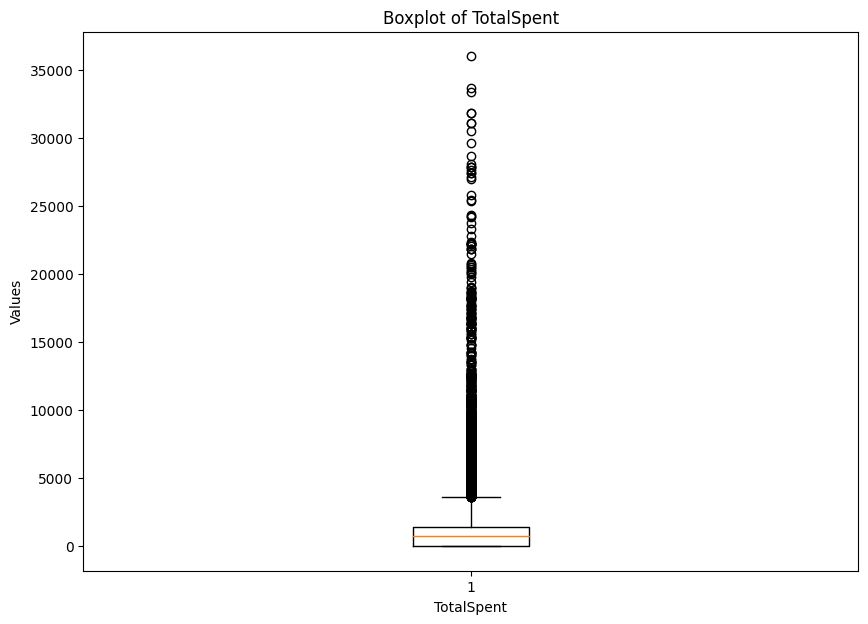

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# gunakan numerical kolom

# Creating plot

fig = plt.figure(figsize=(10, 7))
plt.boxplot(train_test['TotalSpent'])
plt.title(f'Boxplot of TotalSpent')
plt.xlabel("TotalSpent")
plt.ylabel('Values')
plt.show()


Melihat banyak outliers data

In [ ]:
from sklearn.impute import SimpleImputer
cat_imp=SimpleImputer(strategy='most_frequent')
num_imp=SimpleImputer(strategy='median')
train_test[numerical]=pd.DataFrame(num_imp.fit_transform(train_test[numerical]),columns=numerical)
train_test[categorical]=pd.DataFrame(cat_imp.fit_transform(train_test[categorical]),columns=categorical)
train_test['TotalSpent'] = train_test.loc[:,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1) #memastikan kembali agar TotalSpent sesuai dengan penjumlahan

#5. Transformasi Data II

##5.1 Enriching Data

In [ ]:
train_test['LastName'] = train_test['Name'].apply(lambda x: str(x).split(" ")[-1])
train_test.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,Num,Side,TotalSpent,LastName
12827,8980_01,Mars,False,D/273/S,TRAPPIST-1e,18.0,False,1037.0,1.0,2.0,0.0,0.0,Hones Brie,NaN,8980,D,273,S,1040.0,Brie
6479,6834_01,Earth,True,G/1111/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Sonald Coolez,True,6834,G,1111,S,0.0,Coolez
1947,2085_01,Europa,False,C/72/P,TRAPPIST-1e,38.0,False,0.0,590.0,2640.0,6202.0,99.0,Algedia Unaasor,False,2085,C,72,P,9531.0,Unaasor
4859,5185_01,Mars,False,E/330/S,TRAPPIST-1e,29.0,False,523.0,0.0,21.0,4.0,811.0,Cruts Flie,False,5185,E,330,S,1359.0,Flie
3559,3824_01,Earth,False,G/625/S,PSO J318.5-22,49.0,False,0.0,51.0,101.0,50.0,0.0,Byront Mclardson,True,3824,G,625,S,202.0,Mclardson
12806,8934_01,Europa,False,E/573/P,55 Cancri e,32.0,False,0.0,5778.0,0.0,3527.0,6002.0,Bosonon Trodery,NaN,8934,E,573,P,15307.0,Trodery
9161,0980_01,Earth,False,F/181/S,TRAPPIST-1e,55.0,False,0.0,24.0,52.0,808.0,0.0,Vanley Mallerez,NaN,0980,F,181,S,884.0,Mallerez
5304,5662_02,Earth,False,F/1080/S,TRAPPIST-1e,31.0,False,13.0,0.0,0.0,679.0,0.0,Karia Wolferguson,False,5662,F,1080,S,692.0,Wolferguson
1786,1899_01,Earth,False,G/297/S,PSO J318.5-22,25.0,False,11.0,44.0,397.0,0.0,0.0,Sylvin Curton,False,1899,G,297,S,452.0,Curton
9801,2350_01,Mars,False,E/138/P,TRAPPIST-1e,19.0,False,99.0,0.0,1522.0,276.0,0.0,Froos Gooki,NaN,2350,E,138,P,1897.0,Gooki


In [ ]:
if 'LastName' not in categorical:
  categorical.append('LastName')

##5.2 Normalisasi Data

Agar data memiliki rentang yang sesuai dan tidak memiliki terlalu banyak outliers, maka bisa melakukan normalisasi data dengan rentang nilai [0 - 1]

In [ ]:
train_test.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,Num,Side,TotalSpent,LastName
837,0899_02,Earth,True,G/130/P,TRAPPIST-1e,44.0,False,0.0,0.0,0.0,0.0,0.0,Allene Warrishales,False,0899,G,130,P,0.0,Warrishales
6962,7395_03,Europa,False,B/277/S,TRAPPIST-1e,38.0,False,4.0,5974.0,0.0,3682.0,197.0,Algeno Suasharic,False,7395,B,277,S,9857.0,Suasharic
8236,8797_01,Earth,False,F/1705/S,PSO J318.5-22,18.0,False,0.0,3.0,110.0,588.0,0.0,Julies Bradamss,False,8797,F,1705,S,701.0,Bradamss
7606,8129_02,Earth,False,G/1313/P,TRAPPIST-1e,4.0,False,0.0,0.0,0.0,0.0,0.0,Frey Casonston,True,8129,G,1313,P,0.0,Casonston
2371,2552_01,Earth,False,F/492/S,TRAPPIST-1e,19.0,False,0.0,1124.0,4.0,0.0,0.0,Arlen Vincenton,True,2552,F,492,S,1128.0,Vincenton
11844,6888_04,Europa,False,C/219/P,PSO J318.5-22,25.0,True,5100.0,150.0,0.0,170.0,0.0,Astorux Conablese,NaN,6888,C,219,P,5420.0,Conablese
5876,6224_01,Earth,False,F/1191/S,TRAPPIST-1e,16.0,False,0.0,0.0,60.0,0.0,1963.0,Loree Rodger,False,6224,F,1191,S,2023.0,Rodger
10468,3780_01,Mars,True,F/715/S,55 Cancri e,43.0,False,0.0,0.0,0.0,0.0,0.0,Meass Pre,NaN,3780,F,715,S,0.0,Pre
10599,4077_01,Europa,False,E/251/P,55 Cancri e,47.0,False,0.0,375.0,1.0,2284.0,2821.0,Dabiton Roforhauge,NaN,4077,E,251,P,5481.0,Roforhauge
7230,7727_01,Earth,False,E/507/S,55 Cancri e,33.0,False,0.0,0.0,0.0,436.0,224.0,Iree Hurchrisong,True,7727,E,507,S,660.0,Hurchrisong


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_test[numerical] = scaler.fit_transform(train_test[numerical])

In [ ]:
train_test.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,Num,Side,TotalSpent,LastName
8340,8906_01,Earth,False,F/1723/S,55 Cancri e,0.240506,False,0.050255,0.000067,0.000000,0.000000,0.000000,Rena Gainney,False,8906,F,1723,S,0.020063,Gainney
5468,5829_01,Earth,False,F/1113/S,TRAPPIST-1e,0.291139,False,0.000000,0.000704,0.000000,0.000000,0.029669,Jona Sancasey,False,5829,F,1113,S,0.020480,Sancasey
10498,3855_01,Mars,True,E/229/P,PSO J318.5-22,0.784810,False,0.000000,0.000000,0.000000,0.000000,0.000000,Lers Brele,NaN,3855,E,229,P,0.000000,Brele
2335,2515_02,Europa,True,B/96/S,55 Cancri e,0.227848,False,0.000000,0.000000,0.000000,0.000000,0.000000,Keidus Forous,True,2515,B,96,S,0.000000,Forous
10759,4458_01,Earth,True,G/732/P,TRAPPIST-1e,0.202532,False,0.000000,0.000000,0.000000,0.000000,0.000000,Therry Estevesters,NaN,4458,G,732,P,0.000000,Estevesters
5868,6215_02,Europa,False,B/239/S,55 Cancri e,0.468354,False,0.000000,0.003019,0.000000,0.146466,0.000456,Suhelik Sterly,False,6215,B,239,S,0.094006,Sterly
1743,1856_01,Earth,False,F/368/P,TRAPPIST-1e,0.278481,False,0.000558,0.023815,0.000000,0.001205,0.000000,Adriet Combson,True,1856,F,368,P,0.020702,Combson
3591,3862_05,Mars,False,F/729/S,TRAPPIST-1e,0.683544,False,0.010400,0.032905,0.009152,0.000000,0.000000,Cherry Paie,True,3862,F,729,S,0.037375,Paie
5729,6069_01,Mars,False,D/185/S,55 Cancri e,0.189873,False,0.266001,0.000000,0.004640,0.010532,0.000000,Hers Buthe,False,6069,D,185,S,0.115486,Buthe
10473,3794_01,Earth,True,G/621/P,PSO J318.5-22,0.189873,False,0.000000,0.000000,0.000000,0.000000,0.000000,Judya Alshipson,NaN,3794,G,621,P,0.000000,Alshipson


##5.3 Encoding

Encoding merupakan proses yang mengubah data kategorikal menjadi data numerikal yang dapat dipahami oleh algoritma machine learning.

In [ ]:
categorical

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Deck',
 'Side',
 'Group',
 'Num',
 'LastName']

In [ ]:
from sklearn.preprocessing import LabelEncoder
for feature in categorical:
    le= LabelEncoder()
    train_test[feature]= le.fit_transform(train_test[feature])
train_test.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,Num,Side,TotalSpent,LastName
2049,2195_01,0,0,F/440/P,2,0.341772,0,0.0,0.009392,0.005066,0.028829,0.000207,Naomie Coleyanglas,True,2194,5,1274,0,0.029177,485
4027,4302_01,0,1,G/706/P,0,0.075949,0,0.0,0.000000,0.000000,0.000000,0.000000,Sethew Chaellerty,True,4301,6,1569,0,0.000000,398
3867,4147_01,1,0,C/149/S,2,0.683544,0,0.0,0.000000,0.000000,0.142806,0.000000,Caphact Lendly,True,4146,2,546,1,0.088921,1292
10399,3656_02,1,0,E/217/P,2,0.873418,0,0.0,0.010063,0.000000,0.087737,0.003854,Rasatik Tairbatic,NaN,3655,4,1026,0,0.065551,2174
7927,8465_01,2,0,E/542/P,2,0.443038,0,0.0,0.000000,0.000000,0.000000,0.000000,Aark Ches,False,8464,4,1387,0,0.000000,418
6990,7432_01,1,1,E/481/P,2,0.481013,0,0.0,0.000000,0.000000,0.000000,0.000000,Ainkard Amonysidle,True,7431,4,1319,0,0.000000,40
9678,2039_02,2,1,F/405/P,2,0.240506,0,0.0,0.000000,0.000000,0.000000,0.000000,Callix Jaff,NaN,2038,5,1235,0,0.000000,1190
2536,2723_01,1,1,C/99/S,2,0.303797,0,0.0,0.000000,0.000000,0.000000,0.000000,Bosonan Boderbint,True,2722,2,1883,1,0.000000,217
4806,5130_01,0,1,G/838/S,2,0.468354,0,0.0,0.000000,0.000000,0.000000,0.000000,Timmy Klindsayer,True,5129,6,1715,1,0.000000,1250
2653,2837_01,0,0,F/588/P,1,0.291139,0,0.0,0.000000,0.000000,0.000134,0.079518,Sergia Mcgoway,False,2836,5,1437,0,0.053408,1376


#6. Reduksi Data

Sebelum melakukan reduksi data, mari memisahkan training dan testing data

In [ ]:
train=train_test[train_test['Transported'].notnull()].copy()
train.Transported=train.Transported.astype('int')

test=train_test[train_test['Transported'].isnull()].drop('Transported',axis=1)

In [ ]:
train.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,Num,Side,TotalSpent,LastName
215,0225_01,0,1,G/38/P,1,0.734177,0,0.000000,0.000000,0.000000,0.000000,0.000000,Carly Hortis,1,224,6,1206,0,0.000000,1111
8062,8618_01,1,0,B/336/S,0,0.227848,0,0.000000,0.023278,0.000000,0.000000,0.056769,Hallux Resendent,0,8617,1,1158,1,0.057354,1832
5591,5955_01,2,0,E/392/S,2,0.417722,0,0.058351,0.000000,0.006598,0.001383,0.000000,Hon Sturt,0,5954,4,1220,1,0.028399,2128
3518,3775_01,2,1,F/712/S,2,0.531646,0,0.000000,0.000000,0.000000,0.000000,0.000000,Coate Buche,1,3774,5,1576,1,0.000000,290
6601,6970_01,2,0,NaN,2,0.822785,0,0.234383,0.000034,0.000511,0.000000,0.000000,Ret Gin,0,6969,5,1695,1,0.093673,942
131,0140_02,0,0,F/29/P,2,0.329114,0,0.030711,0.000000,0.000000,0.000000,0.019144,Verney Whitakers,0,139,5,1106,0,0.025065,2354
6567,6928_02,0,0,G/1128/S,2,0.139241,0,0.000000,0.000000,0.000000,0.000000,0.000000,Jodye Bookerson,0,6927,6,145,1,0.000000,223
7017,7462_01,0,1,G/1206/P,1,0.164557,0,0.000000,0.000000,0.000000,0.000000,0.000000,Hilia Mckinn,1,7461,6,232,0,0.000000,1381
71,0076_01,2,0,F/18/S,2,0.341772,0,0.010260,0.000000,0.043334,0.000000,0.000000,Conk Dal,1,75,5,890,1,0.032373,586
7734,8254_01,2,1,F/1700/P,2,0.341772,0,0.000000,0.000000,0.000000,0.000000,0.000000,Cocowl Cone,1,8253,5,781,0,0.000000,502


In [ ]:
test.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Deck,Num,Side,TotalSpent,LastName
11062,5149_01,1,0,B/173/P,1,0.468354,1,0.000000,0.568980,0.000000,0.512451,0.216301,Dhenar Slowatic,5148,1,813,0,0.935504,2023
9372,1372_01,0,1,G/210/P,2,0.455696,0,0.000000,0.000000,0.000000,0.000000,0.000000,Thery Cobson,1371,6,1019,0,0.000000,471
11650,6499_07,0,1,G/1052/P,2,0.468354,0,0.000000,0.000000,0.000000,0.000000,0.000000,Helley Barnolderg,6498,6,61,0,0.000000,138
11814,6838_02,1,0,C/217/P,2,0.354430,0,0.000000,0.220105,0.000000,0.153070,0.773629,Quarkab Fasticaly,6837,2,1026,0,0.796454,768
11698,6596_01,2,0,D/207/P,2,0.556962,0,0.000209,0.024989,0.009109,0.000000,0.000000,Hal Terte,6595,3,1015,0,0.026732,2187
11911,7063_02,0,0,E/452/P,2,0.316456,0,0.003490,0.000000,0.000043,0.228713,0.019558,Cellex Hendrewsons,7062,4,1287,0,0.156946,1049
9190,1070_01,0,0,F/221/P,2,0.303797,0,0.000000,0.003086,0.027924,0.000000,0.000000,Valex Wolfaddox,1069,5,1031,0,0.020785,2383
10489,3829_02,0,0,F/721/S,2,0.303797,0,0.000000,0.024620,0.000000,0.000089,0.000083,Hanry Noeley,3828,5,1586,1,0.020507,1530
11045,5107_01,0,0,F/1042/P,2,0.417722,0,0.101138,0.000000,0.000000,0.000000,0.000000,Winia Lerez,5106,5,50,0,0.040265,1298
9032,0725_01,0,1,G/110/P,1,0.341772,0,0.000000,0.000000,0.000000,0.000000,0.000000,Joycey Hewson,724,6,114,0,0.000000,1063


##6.1 Feature Selection

Feature selection bisa dilakukan dengan memilih fitur secara manual, atau menggunakan machine learning untuk mendapatkan fitur paling yang sesuai sebagai pembelajaran model

###6.1.1 Manual Selection

<Axes: >

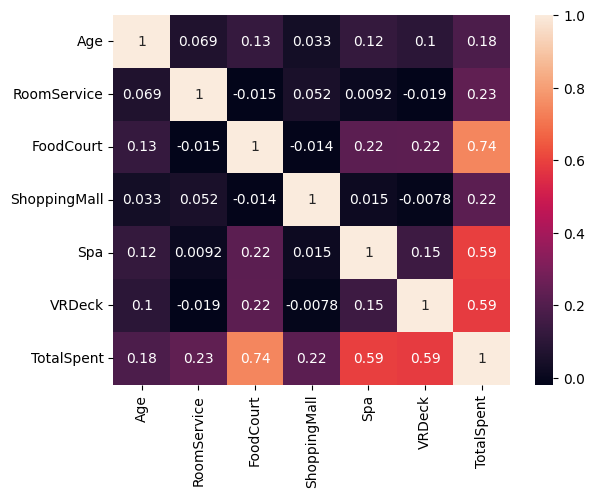

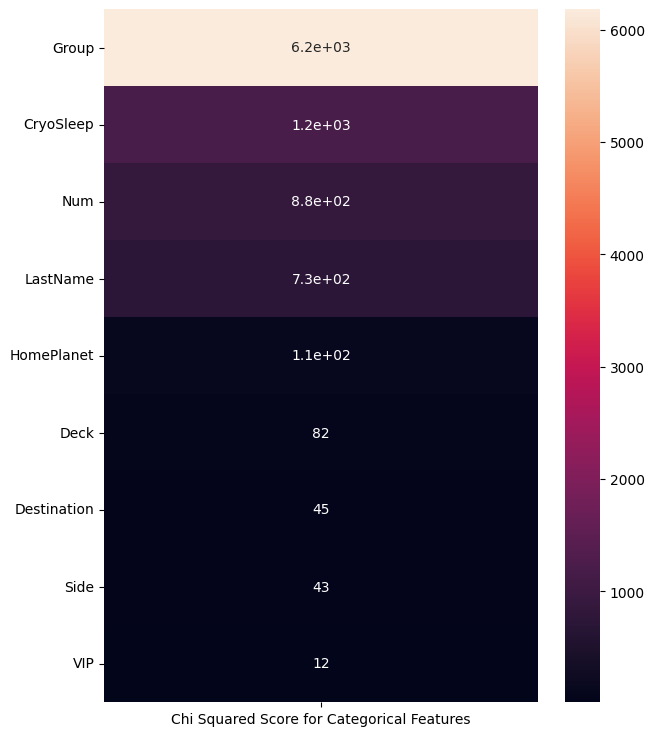

In [ ]:
import seaborn as sns
sns.heatmap(train[numerical].corr(),annot=True)

from sklearn.feature_selection import chi2,SelectKBest

k_best=SelectKBest(score_func=chi2,k='all')
k_best.fit(train[categorical],train['Transported']);
chi_scores=pd.DataFrame(k_best.scores_,index=list(train[categorical].columns),columns=['Chi Squared Score for Categorical Features'])
plt.figure(figsize=(7,9))
sns.heatmap(chi_scores.sort_values(by='Chi Squared Score for Categorical Features',ascending=False),annot=True)

In [ ]:
# mengasumsikan fitur-fitur yang sesuai dengan manual
selected_features_manual = [
    'FoodCourt',
    'VRDeck',
    'Spa',
    'TotalSpent',
    'Group',
    'CryoSleep',
    'Num',
    "LastName",
    'HomePlanet',
    ]

###6.1.2 Selection Menggunakan Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split

X=train.drop(['Transported','PassengerId','Cabin','Name'],axis=1)
print(X.columns)

y=train['Transported']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier

# Train the LightGBM model
model = XGBClassifier()
model.fit(X, y)

# Get permutation materiality
result = permutation_importance(model, X_val, y_val, scoring="f1", n_repeats=20, random_state=42)
sorted_indices = np.argsort(result.importances_mean)[::-1]

# Show the most important features and their respective importance values
top_features = X.columns[sorted_indices[:20]]  # Most 15 importend feature
top_importances = result.importances_mean[sorted_indices[:15]]
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance}")

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group', 'Deck', 'Num',
       'Side', 'TotalSpent', 'LastName'],
      dtype='object')
TotalSpent: 0.07476607531355146
FoodCourt: 0.0709205336001604
Spa: 0.06473714070614953
VRDeck: 0.06258303284606952
Deck: 0.05870962644066104
Age: 0.05349193402725559
Num: 0.051702649551251555
LastName: 0.04822965451267171
RoomService: 0.04555519421152686
Group: 0.04532571393454323
ShoppingMall: 0.03365441030469309
HomePlanet: 0.029660853553633133
Side: 0.024558240652287427
CryoSleep: 0.023208383150123708
Destination: 0.018667476106322543


In [ ]:
selected_features_ml = [
    "TotalSpent",
    "FoodCourt",
    "Spa",
    "VRDeck",
    "Deck",
    "Age",
    "Num",
    "LastName",
    "RoomService",
    "Group",
    "ShoppingMall",
    "HomePlanet",
    "Side",
    "CryoSleep",
    "Destination",
]

#7. Model Selection

##Features Selection Manual

In [ ]:
from sklearn.model_selection import train_test_split
X=train[selected_features_manual]
Y=train['Transported']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train,y_train)
y_preds=model.predict(x_test)
score=accuracy_score(y_test, y_preds)*100
print(f"Testset accuracy for {model} is: ",score)

Testset accuracy for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) is:  76.07820586543991


##Features Selection menggunakan Bantuan

In [ ]:
from sklearn.model_selection import train_test_split
X=train[selected_features_ml]
Y=train['Transported']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train,y_train)
y_preds=model.predict(x_test)
score=accuracy_score(y_test, y_preds)*100
print(f"Testset accuracy for {model} is: ",score)

Testset accuracy for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) is:  79.24094307073031


Terlihat Bahwa Features Selection yang menggunakan bantuan memiliki nilai akurasi yang lebih tinggi daripada manual

##7.1Model Selection

In [ ]:
%pip install catboost

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,train_test_split,cross_val_score

catboost=CatBoostClassifier(verbose=False)
random_forest=RandomForestClassifier()
svm=SVC()
knn=KNeighborsClassifier()
logistic_regression=LogisticRegression()
naive_bayes=GaussianNB()
xgboost=XGBClassifier()
adaboost=AdaBoostClassifier()
decision_tree=DecisionTreeClassifier()
mlp=MLPClassifier()

models=[random_forest,logistic_regression,svm,knn,naive_bayes,xgboost,adaboost,catboost,decision_tree]

In [ ]:
eval_df = pd.DataFrame(columns=['Model', 'Cross Validated Accuracy'],index=None)

In [ ]:
def eval_model(model):
    cv = KFold(n_splits=7)
    model.fit(x_train, y_train)
    score = cross_val_score(model, X, Y, cv=cv, scoring='accuracy') * 100
    eval_df.loc[len(eval_df)] = [str(model), score.mean()]

In [ ]:
for model in models:
    eval_model(model)

eval_df

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,Model,Cross Validated Accuracy
0,RandomForestClassifier(),79.673293
1,LogisticRegression(),71.321687
2,SVC(),53.307226
3,KNeighborsClassifier(),52.697582
4,GaussianNB(),74.036750
5,"XGBClassifier(base_score=None, booster=None, c...",79.638759
6,AdaBoostClassifier(),78.718519
7,<catboost.core.CatBoostClassifier object at 0x...,80.811982
8,DecisionTreeClassifier(),73.714281


Terlihat bahwa model dengan accuracy tertinggi adalah CatBoostClassfier

#8. Submission

In [ ]:
model=catboost
X=train[selected_features_ml]
model.fit(X,Y)
final_predictions=model.predict(test[selected_features_ml])

output=pd.DataFrame({
    'PassengerId':test.PassengerId,
    'Transported':final_predictions
})
output['Transported']=output['Transported'].replace({0:False,1:True})


In [ ]:
output

,PassengerId,Transported
8693,0013_01,True
8694,0018_01,False
8695,0019_01,True
8696,0021_01,True
8697,0023_01,False
...,...,...
12965,9266_02,True
12966,9269_01,True
12967,9271_01,True
12968,9273_01,True


In [ ]:
output.to_csv('submission.csv',index=False)